In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
df = pd.read_csv("../data/AAPL_2006-01-01_to_2018-01-01.csv")
df

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL
...,...,...,...,...,...,...,...
3014,2017-12-22,174.68,175.42,174.50,175.01,16349444,AAPL
3015,2017-12-26,170.80,171.47,169.68,170.57,33185536,AAPL
3016,2017-12-27,170.10,170.78,169.71,170.60,21498213,AAPL
3017,2017-12-28,171.00,171.85,170.48,171.08,16480187,AAPL


Text(0.5, 1.0, 'APPLE stock price')

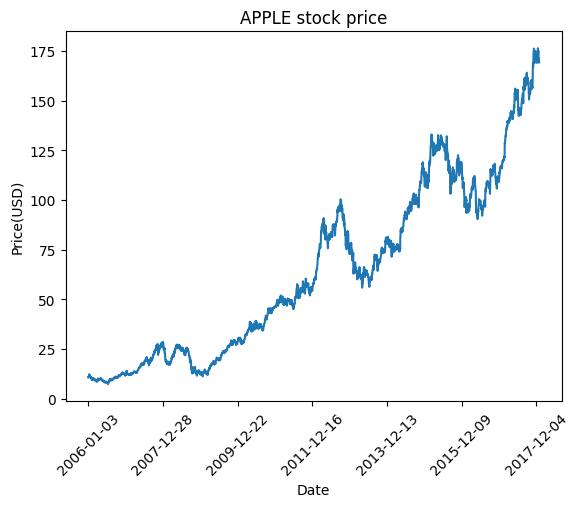

In [3]:
import matplotlib.pyplot as plt

plt.plot(df["Date"], df["Close"])
plt.xticks(range(0, df.shape[0], 500), rotation=45)
plt.xlabel("Date")
plt.ylabel("Price(USD)")
plt.title("APPLE stock price")

In [4]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [6]:
close = df["Close"].values
close, close.shape

(array([ 10.68,  10.71,  10.63, ..., 170.6 , 171.08, 169.23]), (3019,))

In [7]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler(feature_range=(0, 1))
close_min_max = min_max.fit_transform(close.reshape(-1,1))

In [8]:
close_min_max

array([[0.02033337],
       [0.0205107 ],
       [0.02003783],
       ...,
       [0.96559877],
       [0.96843599],
       [0.95750089]])

In [9]:
def create_sequence(data, seq_length):

    sequences = []
    labels = []

    for i in range(len(data) - seq_length):
        sequence = data[i:i + seq_length]
        sequences.append(sequence)

        label = data[i + seq_length]
        labels.append(label)

    return np.array(sequences), np.array(labels)
# The purpose of this function is to create sequences of a specified length (seq_length) from a time series data. 
# These sequences will be used as inputs to the LSTM model, 
# and the corresponding labels (targets) will be the next value in the series, 
# which the model will learn to predict.

In [10]:
X, y = create_sequence(close_min_max, 60)
X, y

(array([[[0.02033337],
         [0.0205107 ],
         [0.02003783],
         ...,
         [0.00744769],
         [0.00679749],
         [0.00981203]],
 
        [[0.0205107 ],
         [0.02003783],
         [0.02163376],
         ...,
         [0.00679749],
         [0.00981203],
         [0.01016669]],
 
        [[0.02003783],
         [0.02163376],
         [0.02139733],
         ...,
         [0.00981203],
         [0.01016669],
         [0.01016669]],
 
        ...,
 
        [[0.86635536],
         [0.87031564],
         [0.86440478],
         ...,
         [0.99166568],
         [0.99166568],
         [0.96542144]],
 
        [[0.87031564],
         [0.86440478],
         [0.87569453],
         ...,
         [0.99166568],
         [0.96542144],
         [0.96559877]],
 
        [[0.86440478],
         [0.87569453],
         [0.87516255],
         ...,
         [0.96542144],
         [0.96559877],
         [0.96843599]]]),
 array([[0.01016669],
        [0.01016669],
        [0.

In [11]:
import torch
X_tensor = torch.tensor(X, dtype=torch.float)
y_tensor = torch.tensor(y, dtype=torch.float)
X_tensor, y_tensor

(tensor([[[0.0203],
          [0.0205],
          [0.0200],
          ...,
          [0.0074],
          [0.0068],
          [0.0098]],
 
         [[0.0205],
          [0.0200],
          [0.0216],
          ...,
          [0.0068],
          [0.0098],
          [0.0102]],
 
         [[0.0200],
          [0.0216],
          [0.0214],
          ...,
          [0.0098],
          [0.0102],
          [0.0102]],
 
         ...,
 
         [[0.8664],
          [0.8703],
          [0.8644],
          ...,
          [0.9917],
          [0.9917],
          [0.9654]],
 
         [[0.8703],
          [0.8644],
          [0.8757],
          ...,
          [0.9917],
          [0.9654],
          [0.9656]],
 
         [[0.8644],
          [0.8757],
          [0.8752],
          ...,
          [0.9654],
          [0.9656],
          [0.9684]]]),
 tensor([[0.0102],
         [0.0102],
         [0.0101],
         ...,
         [0.9656],
         [0.9684],
         [0.9575]]))

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tensor,
                                                    y_tensor,
                                                    test_size=0.2,
                                                    random_state=42)

X_train, X_test, y_train, y_test

(tensor([[[0.8816],
          [0.8959],
          [0.9034],
          ...,
          [0.8817],
          [0.8876],
          [0.9210]],
 
         [[0.0825],
          [0.0870],
          [0.0877],
          ...,
          [0.1051],
          [0.1088],
          [0.1043]],
 
         [[0.4050],
          [0.4053],
          [0.4149],
          ...,
          [0.4320],
          [0.4404],
          [0.4463]],
 
         ...,
 
         [[0.1670],
          [0.1657],
          [0.1672],
          ...,
          [0.2002],
          [0.2011],
          [0.2040]],
 
         [[0.2467],
          [0.2512],
          [0.2555],
          ...,
          [0.2410],
          [0.2442],
          [0.2448]],
 
         [[0.0786],
          [0.0794],
          [0.0787],
          ...,
          [0.1002],
          [0.0986],
          [0.1003]]]),
 tensor([[[0.4243],
          [0.4140],
          [0.4165],
          ...,
          [0.4130],
          [0.4110],
          [0.4105]],
 
         [[0.5481]

In [13]:
import torch
from torch import nn

from torchinfo import summary

In [14]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [15]:
class stockpricev0(nn.Module):
    def __init__(self, input_features, output_features, hidden_size, hidden_layers):
        super().__init__()

        self.hidden_size = hidden_size
        self.hidden_layers = hidden_layers

        self.lstm = nn.LSTM(input_features, hidden_size, hidden_layers, batch_first=True)
        self.linear_1 = nn.Linear(hidden_size, output_features)

    def forward(self, x):
        hidden_state_0 = torch.zeros(self.hidden_layers, x.size(0), self.hidden_size).to(device)
        cell_state_0 = torch.zeros(self.hidden_layers, x.size(0), self.hidden_size).to(device)

        out, _ = self.lstm(x, (hidden_state_0, cell_state_0))
        out = self.linear_1(out[:, -1, :])

        return out


In [16]:
stockpricemodelv0 = stockpricev0(input_features=1,
                                 output_features=1,
                                 hidden_size=50,
                                 hidden_layers=2).to(device)
stockpricemodelv0

stockpricev0(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (linear_1): Linear(in_features=50, out_features=1, bias=True)
)

In [17]:
summary(stockpricemodelv0, input_size=[1, 60, 1])

Layer (type:depth-idx)                   Output Shape              Param #
stockpricev0                             [1, 1]                    --
├─LSTM: 1-1                              [1, 60, 50]               31,000
├─Linear: 1-2                            [1, 1]                    51
Total params: 31,051
Trainable params: 31,051
Non-trainable params: 0
Total mult-adds (M): 1.86
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 0.12
Estimated Total Size (MB): 0.15

In [18]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(stockpricemodelv0.parameters(),
                             lr = 0.01)

In [19]:
torch.manual_seed(42)

train_losses = []
test_losses = []
epoch_count = []

epochs = 100

x_train = X_train.to(device)
x_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):

    epoch_count.append(epoch)

    # training

    stockpricemodelv0.train()
    y_pred = stockpricemodelv0(x_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.detach().cpu().numpy())

    # testing

    stockpricemodelv0.eval()
    with torch.inference_mode():
        test_pred = stockpricemodelv0(x_test)
        test_loss = loss_fn(test_pred, y_test)

        test_losses.append(test_loss.detach().cpu().numpy())

    if epoch%10 == 0:
        print(f"Epoch: {epoch} | train loss: {loss} | test loss: {test_loss}")
    

Epoch: 0 | train loss: 0.2911050319671631 | test loss: 0.13970467448234558
Epoch: 10 | train loss: 0.06723494082689285 | test loss: 0.05839839577674866
Epoch: 20 | train loss: 0.004792290739715099 | test loss: 0.01119777001440525
Epoch: 30 | train loss: 0.004387088119983673 | test loss: 0.00459999730810523
Epoch: 40 | train loss: 0.0014534116489812732 | test loss: 0.0017048282315954566
Epoch: 50 | train loss: 0.0007936378242447972 | test loss: 0.000718628813046962
Epoch: 60 | train loss: 0.0004711102810688317 | test loss: 0.0004466213285923004
Epoch: 70 | train loss: 0.00032662716694176197 | test loss: 0.00027572023100219667
Epoch: 80 | train loss: 0.0002688654640223831 | test loss: 0.00020958481763955206
Epoch: 90 | train loss: 0.00021542480681091547 | test loss: 0.0001693036174401641


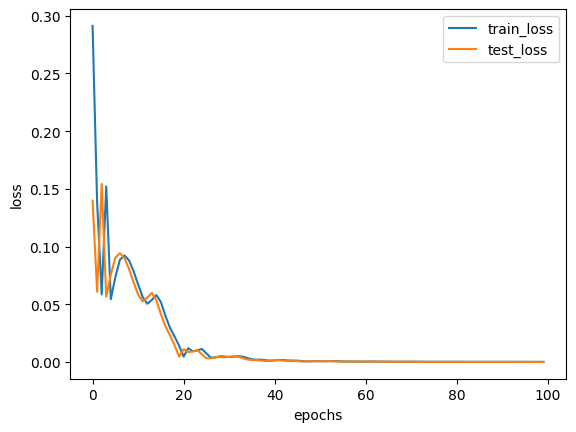

In [20]:
import matplotlib.pyplot as plt
plt.plot(epoch_count, train_losses, label = 'train_loss')
plt.plot(epoch_count, test_losses, label = 'test_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()